In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

fuel_econ = pd.read_csv('C:/Users/Admin/Desktop/fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [2]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Add a trans_type column
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


## Plot 1: Multivariate Fuel Efficiency by Vehicle Class and Transmission Type

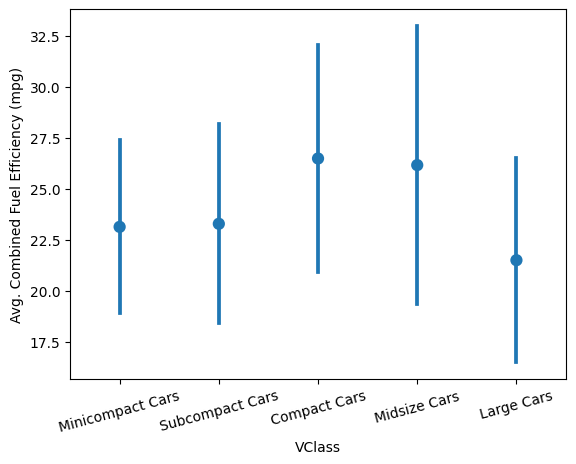

In [3]:
base_color = sb.color_palette()[0]

sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, errorbar = 'sd', linestyles = "")
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

In the chart above, the `pointplot` functions can be used to plot a second variables mean on the vertical axis. Let's extend this bivariate plot of fuel efficiency (`comb`) against the vehicle class (`VClass`) into a multivariate plot by adding transmission type (`trans_type`). 

We add `hue = 'trans_type` to the `pointplot` function to specify the differences. To avoid the dots and bars from overlapping, we should add `dodge = True` to offset the two levels slightly.

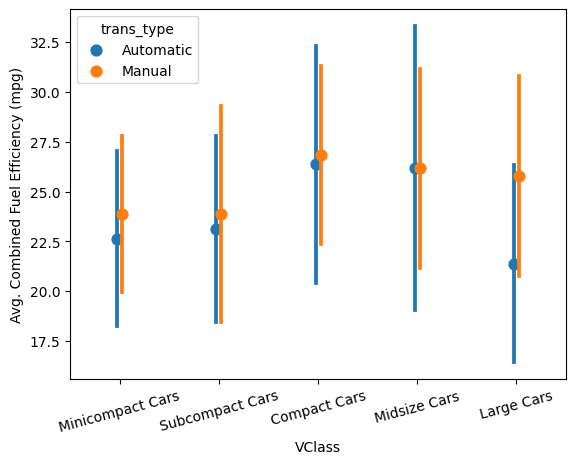

In [4]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type', errorbar = 'sd', 
             linestyles = "", dodge = True);
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

## Plot 2: Clustered Bar Plot

Alternatively, we can change the `pointplot` to `barplot` function to get an adapted clustered bar chart.

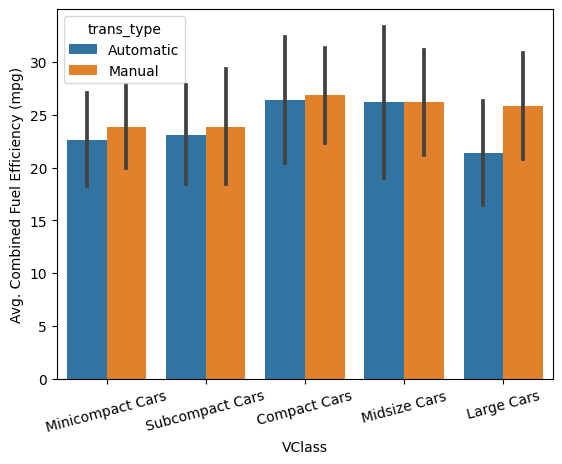

In [5]:
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type', errorbar = 'sd', dodge = True);
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

## Plot 3: Clustered Box Plot
We can even take one more step back on the summarization levels and use the `boxplot` to get a clustered box plot.

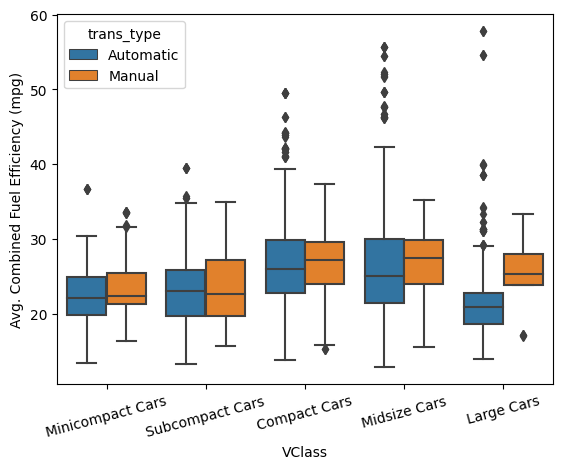

In [6]:
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type', dodge = True);
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

## Plot 4: Heatmap Plot


In [7]:
fuel_econ[['displ', 'comb', 'co2']].describe()

,displ,comb,co2
count,3929.000000,3929.000000,3929.000000
mean,2.950573,24.791339,376.564266
std,1.305901,6.003246,92.338892
min,0.600000,12.821700,29.000000
25%,2.000000,20.658100,315.000000
50%,2.500000,24.000000,369.000000
75%,3.600000,28.227100,429.000000
max,7.000000,57.782400,692.000000


This is the bivariate plot we used to plot.

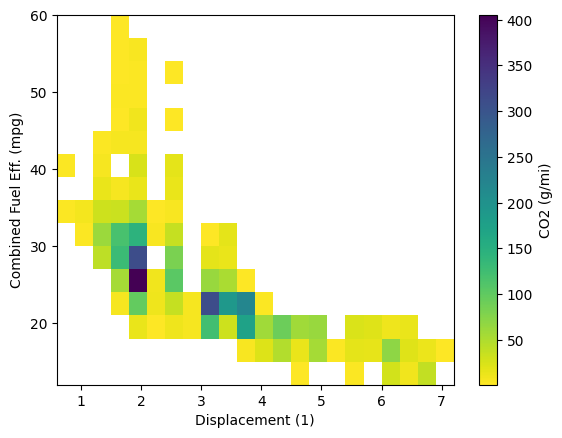

In [8]:
# Multivariate Heatmap
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

# Plot the heatmap
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, 
          cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

We can also adapt heat maps so that instead of color being based on count, color is based on the mean of a third variable. Let's change this heat map of fuel efficiency (`comb`) against engine size (`displ`) so that average `co2` output is plotted instead.

There is a `weights` parameter in `hist2d` that sets how much each data point is worth in the aggregation. By default, each point's weight is worth 1, so that the colors reflect the total counts. If we change it so that each point's weight is equal to its `co2` emissions divided by the number of cars in its bin, then the total within each bin will be the average `co2` emission.

Our first step is to figure out which bin each point falls. We compute this using the pandas `cut` function. In addition to the arguments you've seen before, the `labels = False` is added so that bins are identified numerically, then we apply `astype` to make the indexing later easier.  

In [9]:
# Determine which bin for each point
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right = False, 
                    include_lowest = False, labels = False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right = False, 
                    include_lowest = False, labels = False).astype(int)

displ_bins

0       10
1        4
2       10
3       10
4        6
        ..
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int32

In [10]:
comb_bins

0        2
1        4
2        2
3        2
4        5
        ..
3924    14
3925     9
3926    10
3927     3
3928     3
Name: comb, Length: 3929, dtype: int32

Next, we count up the number of points that fall in each bin. This is done using the `groupby` and `size` functions. This multiindex series is hard to work with, so we use `reset_index` and `pivot` to put the counts in array form. Finally, we use the `values` attribute to get the number of points as an array.

In [11]:
# Count the points in each bin
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values

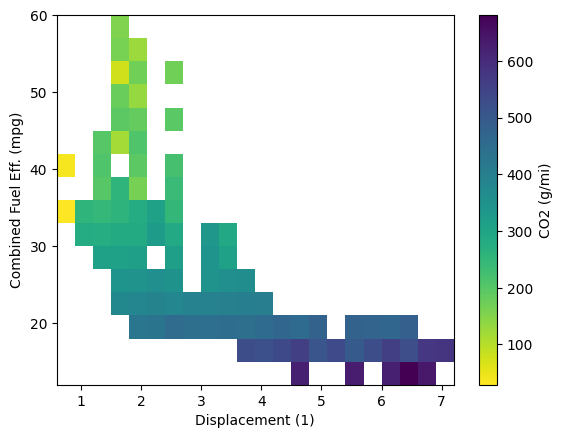

In [12]:
# Divide CO2 by the number of points in each bin
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

# Plot the heatmap
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, 
          cmap = 'viridis_r', bins = [bins_x, bins_y], weights = co2_weights);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar(label = 'CO2 (g/mi)');